# Series Temporales HW 03: BMW vs Volkswagen

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import statsmodels.formula.api as smf
import statsmodels.api as sm
import datetime
import seaborn as sns
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.api import VAR
from statsmodels.tsa.base.datetools import dates_from_str

In [2]:
bmw = yf.Ticker("BMW.DE")
volks = yf.Ticker("VOW.DE")
start = datetime.datetime(2009,1,1) 
end = datetime.datetime(2020,10,31)

In [3]:
bmw = bmw.history(start=start, end=end)
volks = volks.history(start=start, end=end)

In [4]:
bmw

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2009-01-02,13.823101,14.366561,13.823101,14.283444,1830895,0.0,0
2009-01-05,14.424106,14.424106,13.887038,13.973352,2226528,0.0,0
2009-01-06,14.002127,14.161968,13.855073,13.922206,2756874,0.0,0
2009-01-07,13.826301,14.203527,13.720805,14.091639,2313297,0.0,0
2009-01-08,14.005321,14.222706,13.663260,14.002124,2468677,0.0,0
...,...,...,...,...,...,...,...
2020-10-26,60.019884,61.222957,59.943497,60.354069,1118941,0.0,0
2020-10-27,60.373167,60.430457,58.568561,58.692688,1839591,0.0,0
2020-10-28,57.031301,57.250909,54.663352,55.436756,3729376,0.0,0


In [5]:
bmw = bmw.drop(['Low','High','Open','Volume','Dividends', 'Stock Splits'], axis=1)
volks = volks.drop(['Low','High','Open','Volume','Dividends', 'Stock Splits'], axis=1)

In [6]:
bmw = bmw.resample('m').last().dropna().astype('float64').to_period('M')
bmw

,Close
Date,
2009-01,11.898609
2009-02,12.627487
2009-03,13.931794
2009-04,16.783369
2009-05,16.435892
...,...
2020-06,54.252781
2020-07,52.228565
2020-08,57.432327


In [7]:
volks = volks.resample('m').last().dropna().astype('float64').to_period('M')
volks

,Close
Date,
2009-01,192.005600
2009-02,144.706558
2009-03,178.035233
2009-04,185.695969
2009-05,165.715958
...,...
2020-06,136.308868
2020-07,126.226006
2020-08,142.872238


In [8]:
data = bmw.merge(volks, on= 'Date')
data = data.rename(columns={'Date':'Date', 'Close_x': 'BMW', 'Close_y': 'Volkswagen'})

In [9]:
data

,BMW,Volkswagen
Date,,
2009-01,11.898609,192.005600
2009-02,12.627487,144.706558
2009-03,13.931794,178.035233
2009-04,16.783369,185.695969
2009-05,16.435892,165.715958
...,...,...
2020-06,54.252781,136.308868
2020-07,52.228565,126.226006
2020-08,57.432327,142.872238


In [10]:
price_bmw = data.iloc[-1, 0]
price_volks = data.iloc[-1, 1]

In [11]:
returns_df = np.log(data).diff().dropna()
returns_df

,BMW,Volkswagen
Date,,
2009-02,0.059454,-0.282817
2009-03,0.098298,0.207274
2009-04,0.186215,0.042129
2009-05,-0.020921,-0.113836
2009-06,0.055341,0.121788
...,...,...
2020-06,0.077172,0.006300
2020-07,-0.038025,-0.076849
2020-08,0.094978,0.123877


### Test de Granger
H0 -> La serie de la segunda columna **NO** es causa de la primera con un cierto retraso.

H1 -> La serie de la segunda columna **SÍ** es causa de la primera con un cierto retraso.



P-Value > 0.05. -> No hay causalidad

P-Value < 0.05. -> Hay causalidad

In [12]:
gc_res = grangercausalitytests(returns_df[['BMW','Volkswagen']], 12)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2485  , p=0.2658  , df_denom=137, df_num=1
ssr based chi2 test:   chi2=1.2758  , p=0.2587  , df=1
likelihood ratio test: chi2=1.2701  , p=0.2598  , df=1
parameter F test:         F=1.2485  , p=0.2658  , df_denom=137, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.8676  , p=0.1585  , df_denom=134, df_num=2
ssr based chi2 test:   chi2=3.8746  , p=0.1441  , df=2
likelihood ratio test: chi2=3.8216  , p=0.1480  , df=2
parameter F test:         F=1.8676  , p=0.1585  , df_denom=134, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.3699  , p=0.2549  , df_denom=131, df_num=3
ssr based chi2 test:   chi2=4.3293  , p=0.2280  , df=3
likelihood ratio test: chi2=4.2627  , p=0.2345  , df=3
parameter F test:         F=1.3699  , p=0.2549  , df_denom=131, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.1026  , p=0.3583  

In [13]:
gc_res = grangercausalitytests(returns_df[['Volkswagen', 'BMW']], 12)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2544  , p=0.6148  , df_denom=137, df_num=1
ssr based chi2 test:   chi2=0.2600  , p=0.6101  , df=1
likelihood ratio test: chi2=0.2598  , p=0.6103  , df=1
parameter F test:         F=0.2544  , p=0.6148  , df_denom=137, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.7183  , p=0.4895  , df_denom=134, df_num=2
ssr based chi2 test:   chi2=1.4902  , p=0.4747  , df=2
likelihood ratio test: chi2=1.4822  , p=0.4766  , df=2
parameter F test:         F=0.7183  , p=0.4895  , df_denom=134, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.1608  , p=0.3273  , df_denom=131, df_num=3
ssr based chi2 test:   chi2=3.6685  , p=0.2996  , df=3
likelihood ratio test: chi2=3.6206  , p=0.3055  , df=3
parameter F test:         F=1.1608  , p=0.3273  , df_denom=131, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.1260  , p=0.0813  

## Selección Automática del VAR

In [14]:
model = VAR(returns_df)

In [15]:
model.select_order(15)

In [16]:
results = model.fit(maxlags=15, ic='aic')
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 26, Nov, 2021
Time:                     10:40:02
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -9.78183
Nobs:                     140.000    HQIC:                  -9.85667
Log likelihood:           302.251    FPE:                4.97803e-05
AIC:                     -9.90790    Det(Omega_mle):     4.77135e-05
--------------------------------------------------------------------
Results for equation BMW
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                 0.009729         0.007009            1.388           0.165
L1.BMW                0.063437         0.105383            0.602           0.547
L1.Volkswagen        -0.086736         0.077626           -1.1

Text(0.5, 1.0, 'Evolución Mensual del Precio de las Acciones de BMW y VW')

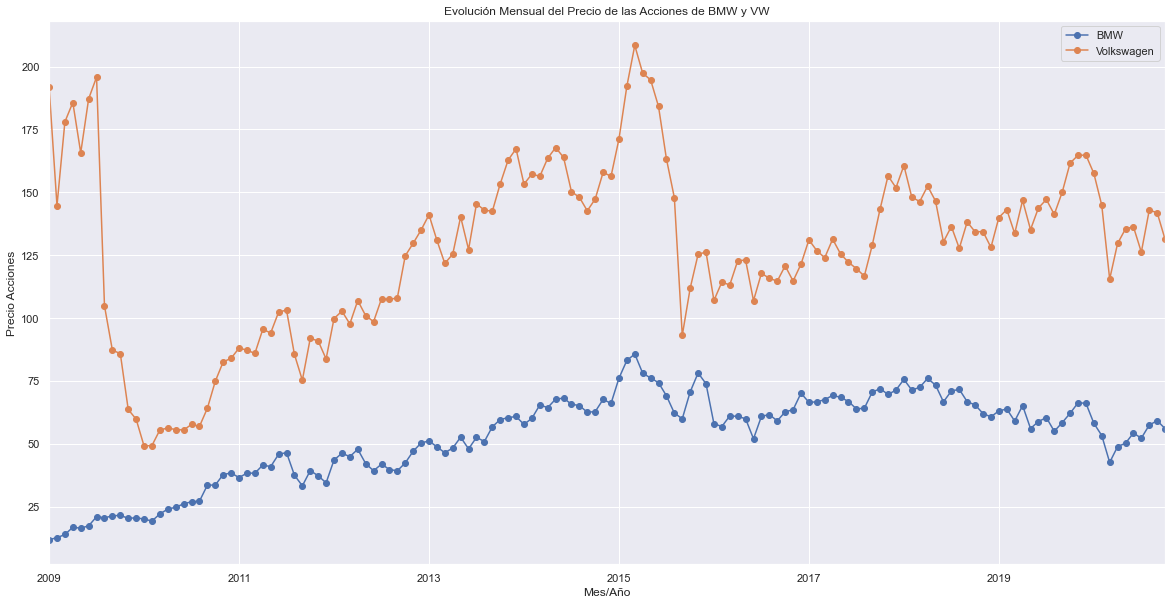

In [17]:
sns.set(rc={'figure.figsize':(20, 10)})
ax = data.plot(marker='o', linestyle='-')
ax.set_ylabel('Precio Acciones')
ax.set_xlabel('Mes/Año')
ax.set_title('Evolución Mensual del Precio de las Acciones de BMW y VW')

Text(0.5, 1.0, 'Evolución Mensual del Precio de las Acciones de BMW y VW')

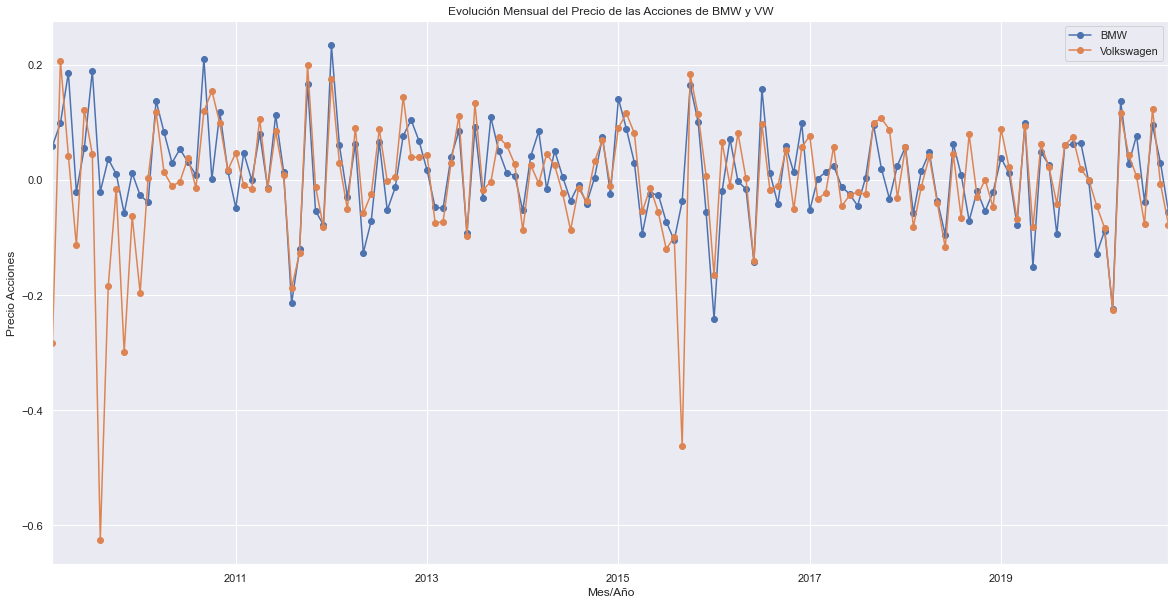

In [18]:
sns.set(rc={'figure.figsize':(20, 10)})
ax = returns_df.plot(marker='o', linestyle='-')
ax.set_ylabel('Precio Acciones')
ax.set_xlabel('Mes/Año')
ax.set_title('Evolución Mensual del Precio de las Acciones de BMW y VW')

## Predicción

In [19]:
lag_order = results.k_ar
predictions_VAR = results.forecast(returns_df.values[-lag_order:], 12)
predictions_VAR

array([[ 0.01299012,  0.00116648],
       [ 0.01045144, -0.00067776],
       [ 0.01045036, -0.00056726],
       [ 0.01044071, -0.00056304],
       [ 0.01043973, -0.0005622 ],
       [ 0.01043959, -0.0005621 ],
       [ 0.01043958, -0.00056209],
       [ 0.01043958, -0.00056209],
       [ 0.01043958, -0.00056209],
       [ 0.01043958, -0.00056209],
       [ 0.01043958, -0.00056209],
       [ 0.01043958, -0.00056209]])

In [20]:
VAR_bmw = (np.exp(np.cumsum(predictions_VAR[:,0]))*price_bmw)[-1]
VAR_volks = (np.exp(np.cumsum(predictions_VAR[:,1]))*price_volks)[-1]
print(VAR_bmw, VAR_volks)

63.67004387062616 130.63346431976558


In [21]:
bmw_comparison = yf.Ticker("BMW.DE")
volks_comparison = yf.Ticker("VOW.DE")
start = datetime.datetime(2009,1,1) 
end = datetime.datetime(2021,10,31)

In [22]:
bmw_comparison = bmw_comparison.history(start=start, end=end)
volks_comparison = volks_comparison.history(start=start, end=end)

In [23]:
bmw = bmw_comparison.drop(['Low','High','Open','Volume','Dividends', 'Stock Splits'], axis=1)
volks = volks_comparison.drop(['Low','High','Open','Volume','Dividends', 'Stock Splits'], axis=1)

In [24]:
bmw = bmw.resample('m').last().dropna().astype('float64').to_period('M')
volks = volks.resample('m').last().dropna().astype('float64').to_period('M')

In [25]:
data = bmw.merge(volks, on= 'Date')
data = data.rename(columns={'Date':'Date', 'Close_x': 'BMW', 'Close_y': 'Volkswagen'})
data

,BMW,Volkswagen
Date,,
2009-01,11.898609,192.005585
2009-02,12.627488,144.706573
2009-03,13.931797,178.035248
2009-04,16.783371,185.695953
2009-05,16.435892,165.715942
...,...,...
2021-06,89.309998,272.048065
2021-07,83.879997,280.000000
2021-08,80.370003,283.200012


### Plot de los forecast

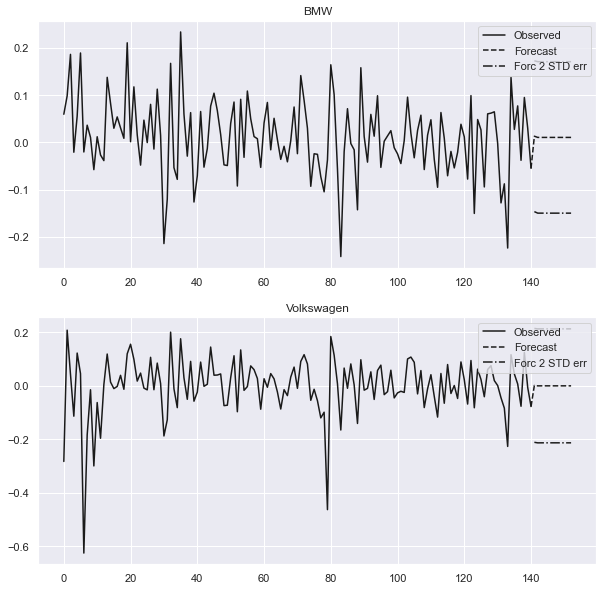

In [26]:
results.plot_forecast(12);

### Función de Respuesta al Impulso

In [27]:
irf = results.irf(12)

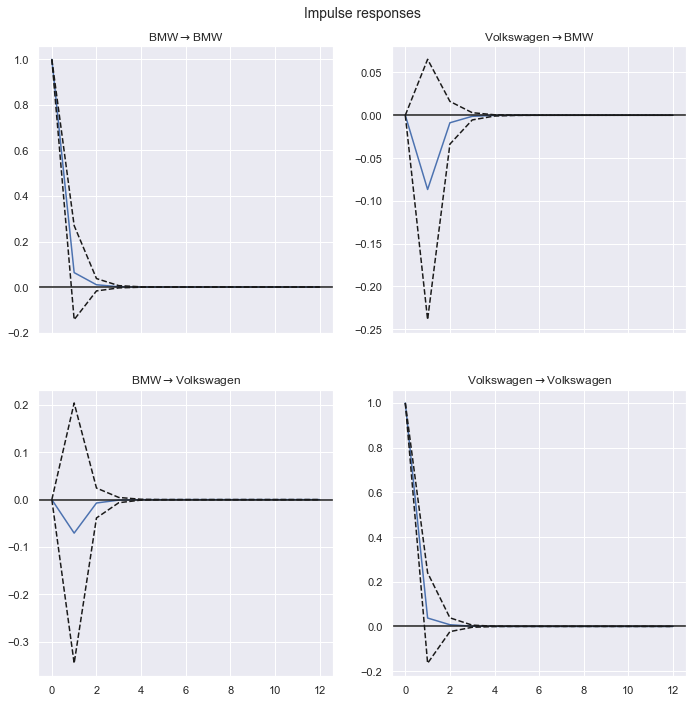

In [28]:
irf.plot(orth=False);

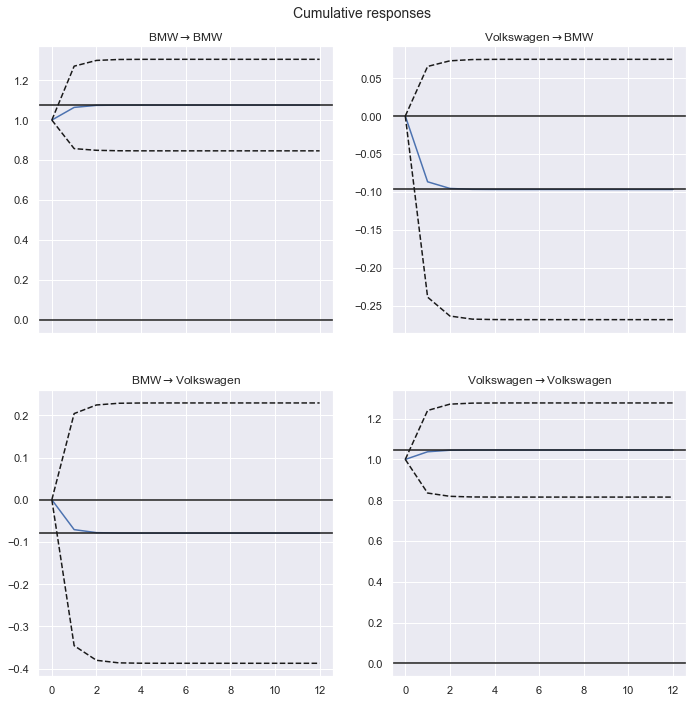

In [29]:
irf.plot_cum_effects(orth=False);

In [30]:
fevd = results.fevd(12)
fevd.summary()

FEVD for BMW
           BMW  Volkswagen
0     1.000000    0.000000
1     0.991917    0.008083
2     0.991836    0.008164
3     0.991834    0.008166
4     0.991834    0.008166
5     0.991834    0.008166
6     0.991834    0.008166
7     0.991834    0.008166
8     0.991834    0.008166
9     0.991834    0.008166
10    0.991834    0.008166
11    0.991834    0.008166

FEVD for Volkswagen
           BMW  Volkswagen
0     0.388610    0.611390
1     0.388818    0.611182
2     0.388805    0.611195
3     0.388805    0.611195
4     0.388805    0.611195
5     0.388805    0.611195
6     0.388805    0.611195
7     0.388805    0.611195
8     0.388805    0.611195
9     0.388805    0.611195
10    0.388805    0.611195
11    0.388805    0.611195




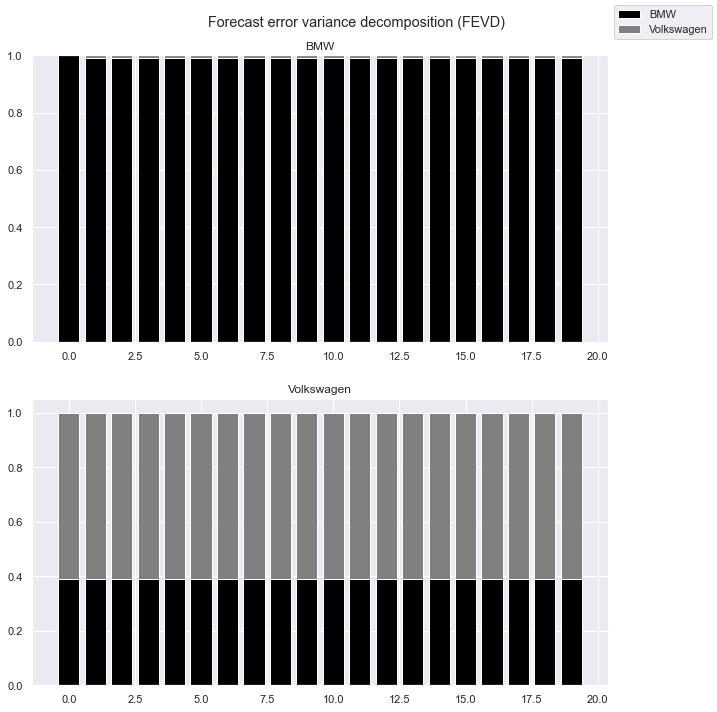

In [31]:
results.fevd(20).plot();

### Causalidad Granger

In [32]:
results.test_causality('Volkswagen', 'BMW', kind='f').summary() # BMW explica el precio de Volkswagen

Test statistic,Critical value,p-value,df
0.2544,3.876,0.614,"(1, 274)"


In [33]:
results.test_causality('BMW', 'Volkswagen', kind='f').summary()

Test statistic,Critical value,p-value,df
1.249,3.876,0.265,"(1, 274)"


### Normalidad

In [34]:
results.test_normality().summary()

Test statistic,Critical value,p-value,df
2479.,9.488,0.000,4


# Volatilidad: Modelos GARCH

In [35]:
bmw = yf.Ticker("BMW.DE")
volks = yf.Ticker("VOW.DE")
start = datetime.datetime(1996,11,8) 
end = datetime.datetime(2020,10,31)

In [36]:
bmw = bmw.history(start=start, end=end)

In [37]:
bmw

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1996-11-08,10.063324,10.063324,10.041772,10.041772,767000,0.0,0
1996-11-11,10.052273,10.057800,9.992590,10.014694,260000,0.0,0
1996-11-12,10.036245,10.128534,9.998114,10.090404,1066000,0.0,0
1996-11-13,10.137379,10.137379,10.052274,10.074379,793000,0.0,0
1996-11-14,10.060563,10.106983,10.020221,10.106983,351000,0.0,0
...,...,...,...,...,...,...,...
2020-10-26,60.019884,61.222957,59.943497,60.354069,1118941,0.0,0
2020-10-27,60.373163,60.430453,58.568557,58.692684,1839591,0.0,0
2020-10-28,57.031301,57.250909,54.663352,55.436756,3729376,0.0,0


In [38]:
bmw = bmw.drop(['Low','High','Open','Volume','Dividends', 'Stock Splits'], axis=1)

In [39]:
bmw

,Close
Date,
1996-11-08,10.041772
1996-11-11,10.014694
1996-11-12,10.090404
1996-11-13,10.074379
1996-11-14,10.106983
...,...
2020-10-26,60.354069
2020-10-27,58.692684
2020-10-28,55.436756


In [40]:
price_bmw2 = bmw.iloc[-1, 0]
price_bmw2

56.02873992919922

In [41]:
bmw_returns = bmw.rename(columns={'Date':'Date', 'Close':'Price'})
bmw_returns

,Price
Date,
1996-11-08,10.041772
1996-11-11,10.014694
1996-11-12,10.090404
1996-11-13,10.074379
1996-11-14,10.106983
...,...
2020-10-26,60.354069
2020-10-27,58.692684
2020-10-28,55.436756


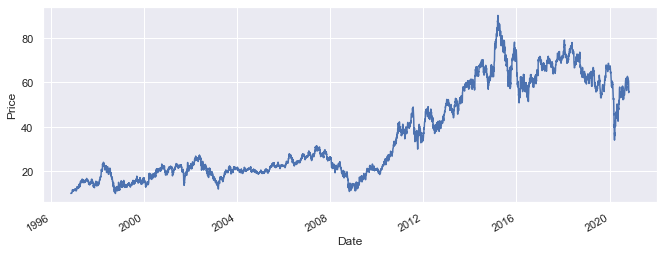

In [42]:
sns.set(rc={'figure.figsize':(11, 4)})
# Plot stock prices
ax = bmw_returns.Price.plot( linestyle='-')
ax.set_ylabel('Price');

## Calculate Daily Logarithmic Return and Squared

In [43]:
bmw_returns['log_ret'] =np.log(bmw_returns.Price).diff()
bmw_returns.tail()

,Price,log_ret
Date,,
2020-10-26,60.354069,-0.011326
2020-10-27,58.692684,-0.027913
2020-10-28,55.436756,-0.057072
2020-10-29,55.694557,0.004640
2020-10-30,56.028740,0.005982


In [44]:
bmw_returns['Squared'] =bmw_returns['log_ret']**2
bmw_returns.tail()

,Price,log_ret,Squared
Date,,,
2020-10-26,60.354069,-0.011326,0.000128
2020-10-27,58.692684,-0.027913,0.000779
2020-10-28,55.436756,-0.057072,0.003257
2020-10-29,55.694557,0.004640,0.000022
2020-10-30,56.028740,0.005982,0.000036


# Plot return squared

Text(0.5, 0.8, 'Volatilidad')

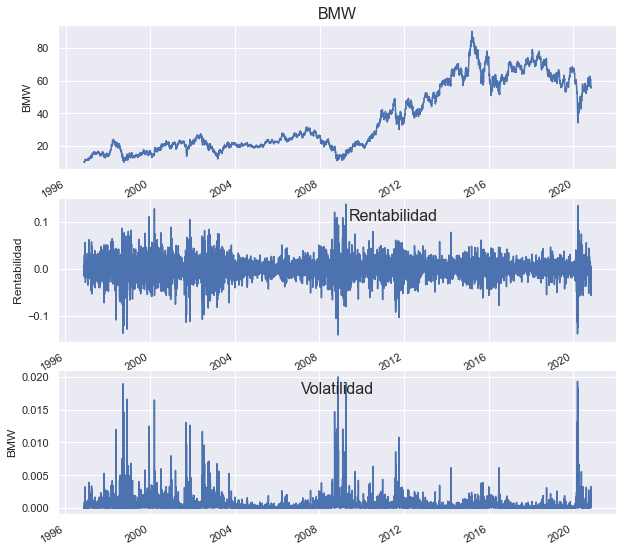

In [45]:
fig = plt.figure(figsize=(10,10))
plt.subplot(311)
ax=bmw_returns.Price.plot( linestyle='-')
ax.set_ylabel('BMW')
ax.set_xlabel('')
ax.set_title('BMW', y=1, fontsize = 16)
plt.subplot(312)
ax=bmw_returns.log_ret.plot( linestyle='-')
ax.set_ylabel('Rentabilidad')
ax.set_xlabel('')
ax.set_title('Rentabilidad', y=0.8, x=0.6,fontsize = 16)
plt.subplot(313)
ax=bmw_returns.Squared.plot( linestyle='-')
ax.set_ylabel('BMW')
ax.set_xlabel('')
ax.set_title('Volatilidad', y=0.8, fontsize = 16)

## Testing mean

In [46]:
from scipy import stats
alpha=0.05
t, p =stats.ttest_1samp(bmw_returns['log_ret'].dropna(),0.0)
print ('Estadítico t:',t)
print ('p-value:',p)

if  p < alpha:
    print (f'Con {alpha} de significación: Rechazamos la hipotesis de media cero.')
else:
    print (f'Con {alpha} de significación: No podemos rechazar la hipotesis de media cero.')

Estadítico t: 1.0061952139617394
p-value: 0.31436127306480177
Con 0.05 de significación: No podemos rechazar la hipotesis de media cero.


## ACF y PACF ## Ljung-Box Test

In [47]:
# Autocorrelation Fuction Original Time Series
from sktime.utils.plotting import plot_correlations

In [48]:
bmw_vol=bmw_returns['Squared'].astype('float64').to_period('D').sort_index().dropna()
bmw_vol.tail()

Date
2020-10-26    0.000128
2020-10-27    0.000779
2020-10-28    0.003257
2020-10-29    0.000022
2020-10-30    0.000036
Freq: D, Name: Squared, dtype: float64

(<Figure size 864x576 with 3 Axes>,
 array([<AxesSubplot:ylabel='Squared'>,
        <AxesSubplot:title={'center':'Autocorrelation'}>,
        <AxesSubplot:title={'center':'Partial Autocorrelation'}>],
       dtype=object))

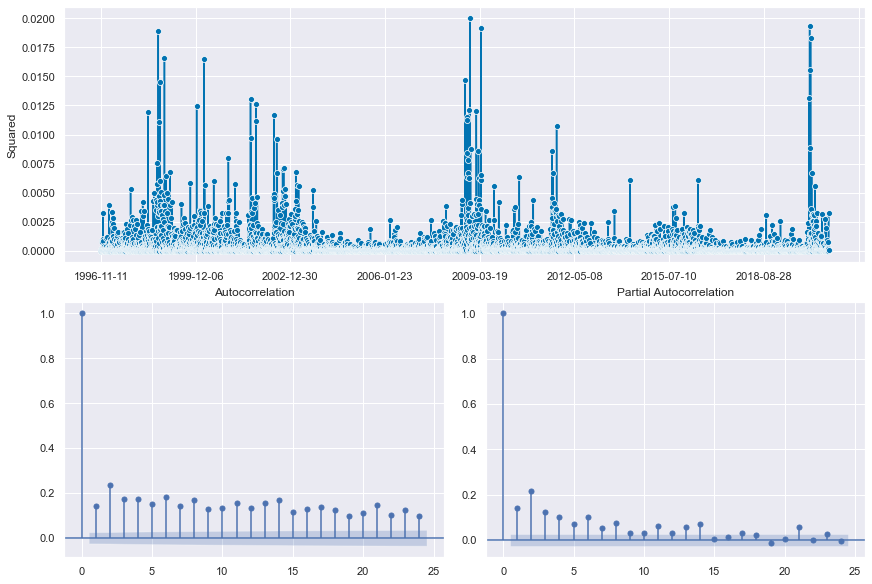

In [49]:
# Plot Autocorrelation
plot_correlations(bmw_vol)

In [50]:
# import function test Ljung_Box
import statsmodels.api as sm
test_Ljung_Box=sm.stats.acorr_ljungbox

In [51]:
#
# testing Ljung-Box
# pvalue < alpha -> No Ruido Blanco
test_Ljung_Box(bmw_vol, lags=[10,20,30], return_df=True)

,lb_stat,lb_pvalue
10,1672.969947,0.0
20,2759.137348,0.0
30,3516.354262,0.0


## LM test

In [52]:
# import function test LM-Arch
import statsmodels.api as sm
test_LM_ARCH=sm.stats.diagnostic.het_arch

In [53]:
# testing LM-ARCH
# pvalue < alpha -> ARCH
lm, lmpval, f, pval, result_int =test_LM_ARCH(bmw_returns['log_ret'].dropna(), nlags=20, store=True)
print ('Estadístico LM: ', lm)
print ('p-value: ', lmpval)
print ('Estadístico F: ', f)
print ('p-value: ', pval)

Estadístico LM:  774.9848055409258
p-value:  2.877214774340737e-151
Estadístico F:  44.206142682811524
p-value:  2.7295131197086393e-162


In [54]:
#
result_int.resols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     44.21
Date:                Fri, 26 Nov 2021   Prob (F-statistic):          2.73e-162
Time:                        10:40:08   Log-Likelihood:                 32839.
No. Observations:                6129   AIC:                        -6.564e+04
Df Residuals:                    6108   BIC:                        -6.550e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001   1.93e-05      6.648      0.000    9.06e-05       0.000
x1             0.0335      0.013      2.621      0.009       0.008       0.059
x2             0.1407      0.013     10.988      0.000       0.116       0.166
x3             0.0655      0.013      5.061      0.000       0.040       0.091
x4             0.0556      0.013      4.299      0.000       0.030       0.081
x5             0.0320      0.013      2.472      0.013       0.007       0.057
x6             0.0654      0.013      5.044      0.000       0.040       0.091
x7             0.0277      0.013      2.135      0.033       0.002       0.053
x8             0.0552      0.013      4.259      0.000       0.030       0.081
x9             0.0097      0.013      0.751      0.453      -0.016       0.035
x10            0.0123      0.013      0.946      0.344      -0.013       0.038
x11            0.0444      0.013      3.422      0.001       0.019       0.070
x12            0.0170      0.013      1.312      0.190      -0.008       0.042
x13            0.0506      0.013      3.901      0.000       0.025       0.076
x14            0.0640      0.013      4.934      0.000       0.039       0.089
x15            0.0002      0.013      0.012      0.991      -0.025       0.026
x16            0.0095      0.013      0.729      0.466      -0.016       0.035
x17            0.0337      0.013      2.605      0.009       0.008       0.059
x18            0.0209      0.013      1.618      0.106      -0.004       0.046
x19           -0.0140      0.013     -1.092      0.275      -0.039       0.011
x20            0.0057      0.013      0.444      0.657      -0.019       0.031
==============================================================================
Omnibus:                     7970.906   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1798525.992
Skew:                           7.205   Prob(JB):                         0.00
Kurtosis:                      85.674   Cond. No.                         998.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# GARCH (1, 1)

In [55]:
from arch.univariate import ARX
from arch.univariate import ARCH, GARCH

In [56]:
# Modelo AR para la media
ar = ARX(100*bmw_returns['log_ret'].dropna(), lags=[15])
print(ar.fit().summary())

                     AR - Constant Variance Model Results                     
Dep. Variable:                log_ret   R-squared:                       0.000
Mean Model:                        AR   Adj. R-squared:                  0.000
Vol Model:          Constant Variance   Log-Likelihood:               -13484.1
Distribution:                  Normal   AIC:                           26974.3
Method:            Maximum Likelihood   BIC:                           26994.4
                                        No. Observations:                 6134
Date:                Fri, Nov 26 2021   Df Residuals:                     6132
Time:                        10:40:08   Df Model:                            2
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
Const           0.0273  2.788e-02      0.978      0.

In [57]:
# MODELO 
# GARCH(1,1)
ar.volatility = GARCH(p=1,q=1)
res = ar.fit(update_freq=0, disp="off")
print(res.summary())

                           AR - GARCH Model Results                           
Dep. Variable:                log_ret   R-squared:                       0.000
Mean Model:                        AR   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -12583.2
Distribution:                  Normal   AIC:                           25176.4
Method:            Maximum Likelihood   BIC:                           25210.0
                                        No. Observations:                 6134
Date:                Fri, Nov 26 2021   Df Residuals:                     6132
Time:                        10:40:08   Df Model:                            2
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
Const           0.0541  2.126e-02      2.546  1.090e

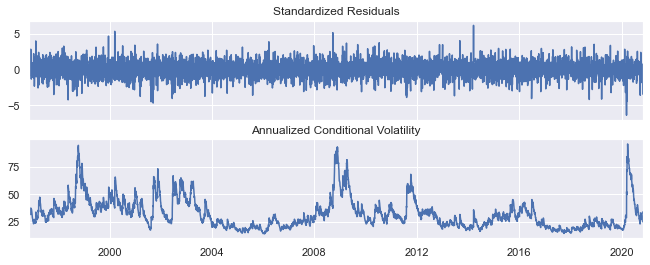

In [58]:
fig = res.plot(annualize="D")

In [59]:
# Análisis Residuos
mod1_std_resid=(res.resid / res.conditional_volatility).astype('float64').to_period('D').sort_index().dropna()

(<Figure size 864x576 with 3 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:title={'center':'Autocorrelation'}>,
        <AxesSubplot:title={'center':'Partial Autocorrelation'}>],
       dtype=object))

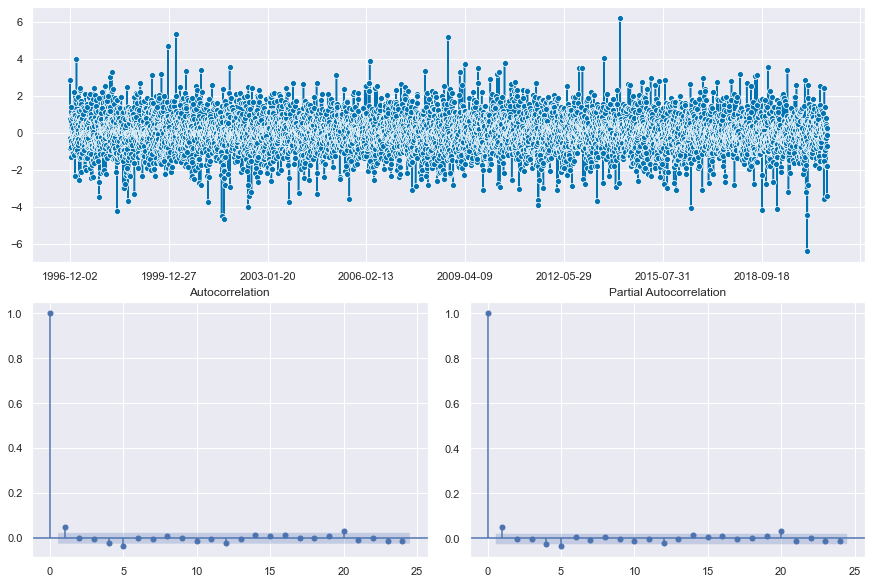

In [60]:
# Plot Autocorrelation
plot_correlations(mod1_std_resid)

(<Figure size 864x576 with 3 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:title={'center':'Autocorrelation'}>,
        <AxesSubplot:title={'center':'Partial Autocorrelation'}>],
       dtype=object))

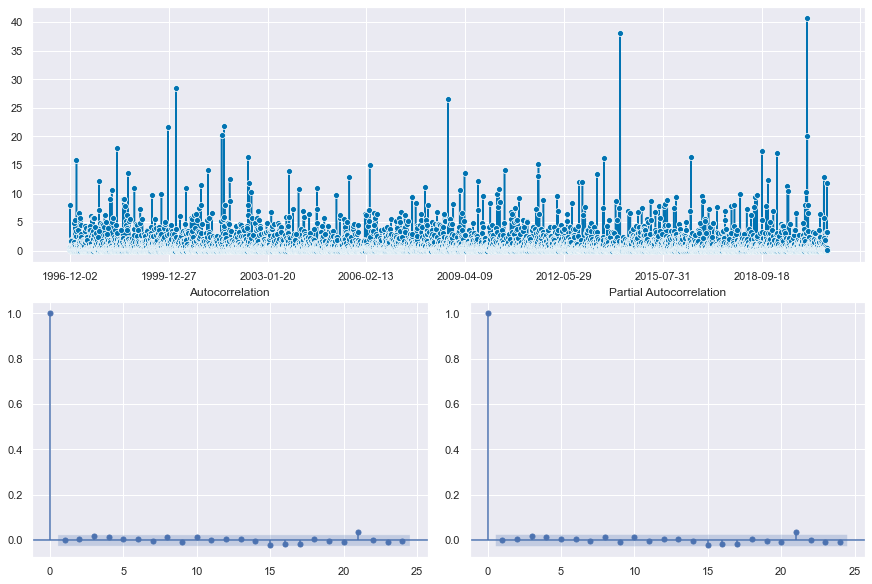

In [61]:
# Plot Autocorrelation
plot_correlations(mod1_std_resid**2)

In [62]:
#
# testing Ljung-Box
# pvalue < alpha -> No Ruido Blanco
test_Ljung_Box(mod1_std_resid**2, lags=[10,20,30], return_df=True)

,lb_stat,lb_pvalue
10,6.377488,0.782614
20,15.188674,0.765512
30,26.501511,0.649306


/Users/aitor/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


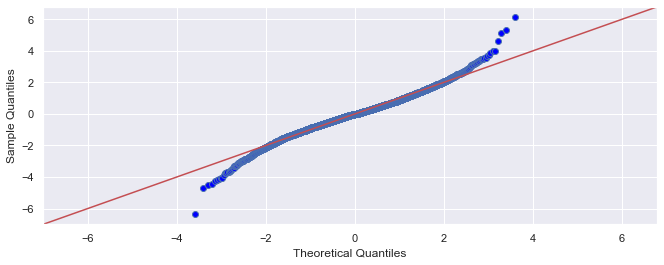

In [63]:
# qqplot
sm.qqplot(mod1_std_resid,line='45')
plt.show()

 ## GARCH(1,1) + t-student

In [64]:
#
from arch.univariate import StudentsT

In [65]:
#
ar.distribution = StudentsT()
res = ar.fit(update_freq=0, disp="off")
print(res.summary())

                              AR - GARCH Model Results                              
Dep. Variable:                      log_ret   R-squared:                       0.000
Mean Model:                              AR   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -12434.3
Distribution:      Standardized Student's t   AIC:                           24880.5
Method:                  Maximum Likelihood   BIC:                           24920.9
                                              No. Observations:                 6134
Date:                      Fri, Nov 26 2021   Df Residuals:                     6132
Time:                              10:40:10   Df Model:                            2
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------

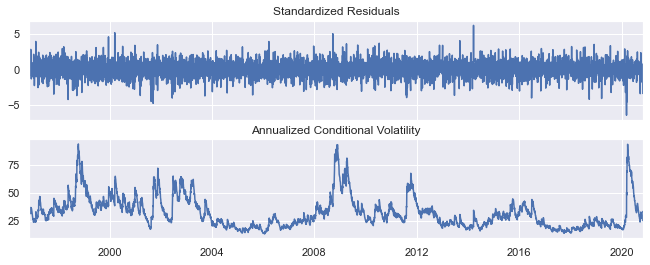

In [66]:
#
fig = res.plot(annualize="D")

In [67]:
# Análisis Residuos
mod1_std_resid=(res.resid / res.conditional_volatility).astype('float64').to_period('D').sort_index().dropna()

(<Figure size 864x576 with 3 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:title={'center':'Autocorrelation'}>,
        <AxesSubplot:title={'center':'Partial Autocorrelation'}>],
       dtype=object))

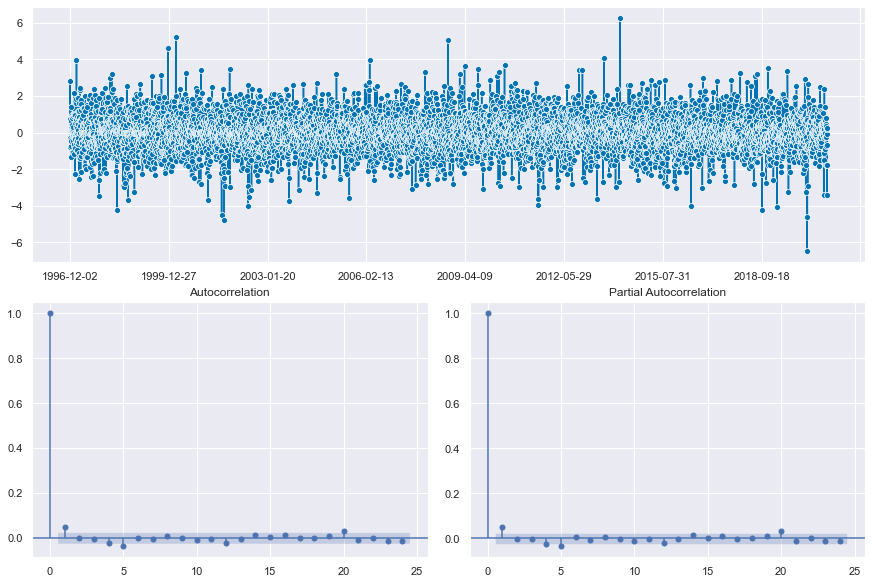

In [68]:
# Plot Autocorrelation
plot_correlations(mod1_std_resid)

(<Figure size 864x576 with 3 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:title={'center':'Autocorrelation'}>,
        <AxesSubplot:title={'center':'Partial Autocorrelation'}>],
       dtype=object))

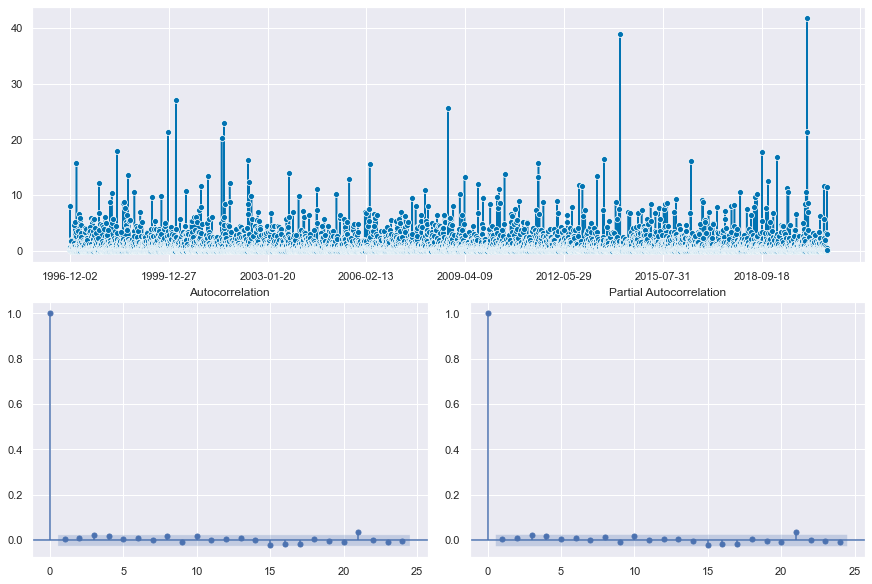

In [69]:
# Plot Autocorrelation
plot_correlations(mod1_std_resid**2)

In [70]:
#
# testing Ljung-Box
# pvalue < alpha -> No Ruido Blanco
test_Ljung_Box(mod1_std_resid**2, lags=[10,20,30], return_df=True)

,lb_stat,lb_pvalue
10,10.240744,0.419632
20,18.455636,0.557420
30,30.349197,0.447878


/Users/aitor/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


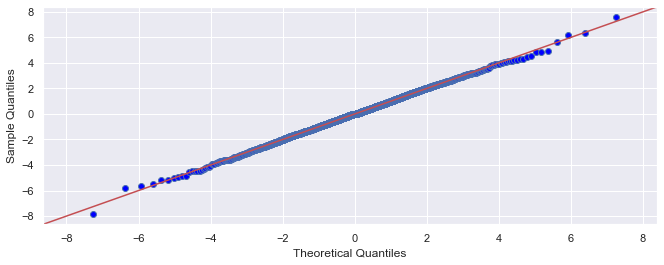

In [71]:
# qqplot t-student
sm.qqplot(mod1_std_resid,dist=stats.t,fit=True,line='45')
plt.show()

## Forecast Volatility

In [72]:
# Predicción 30 días
forecasts = res.forecast(horizon=30, reindex=False)

In [73]:
# Mean
predictions_GARCH = forecasts.mean
predictions_GARCH

,h.01,h.02,h.03,h.04,h.05,h.06,h.07,h.08,h.09,h.10,...,h.21,h.22,h.23,h.24,h.25,h.26,h.27,h.28,h.29,h.30
Date,,,,,,,,,,,,,,,,,,,,,
2020-10-30,0.026636,0.059969,0.041828,0.090269,0.010574,0.023337,0.024814,0.044314,0.03169,0.039374,...,0.036771,0.036745,0.036403,0.036624,0.036489,0.036179,0.035669,0.034771,0.036671,0.036712


In [74]:
# Varianza
(forecasts.variance**0.5)*np.sqrt(252)

,h.01,h.02,h.03,h.04,h.05,h.06,h.07,h.08,h.09,h.10,...,h.21,h.22,h.23,h.24,h.25,h.26,h.27,h.28,h.29,h.30
Date,,,,,,,,,,,,,,,,,,,,,
2020-10-30,31.912774,31.952834,31.992769,32.032579,32.072265,32.111828,32.151269,32.190587,32.229784,32.26886,...,32.695731,32.733406,32.770967,32.808415,32.84575,32.882973,32.920085,32.957085,32.993974,33.030753


In [75]:
bmw_GARCH_prices = (np.exp(np.cumsum(predictions_GARCH))*price_bmw2)
bmw_GARCH_prices

,h.01,h.02,h.03,h.04,h.05,h.06,h.07,h.08,h.09,h.10,...,h.21,h.22,h.23,h.24,h.25,h.26,h.27,h.28,h.29,h.30
Date,,,,,,,,,,,,,,,,,,,,,
2020-10-30,57.5412,59.491494,58.422031,61.321681,56.624324,57.351681,57.436438,58.56744,57.83271,58.27883,...,58.127298,58.125792,58.10591,58.118781,58.110946,58.092927,58.063275,58.011186,58.121483,58.123885


In [76]:
route= "C:/Users/Alvaro/Downloads/BMW.MI.csv"
bmw_nov_2020 = pd.read_csv(route)
bmw_nov_2020.drop(['Low','High','Open','Volume','Close'], axis=1)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Alvaro/Downloads/BMW.MI.csv'